# Sliding Window
- For each of these windows, we would take the window region, extract features from it, and apply an image classifier to determine if the window contains an abject that interests us.

In [7]:
import import_ipynb
from object_detection.helpers import sliding_window, pyramid
import cv2
import sys
sys.path.append("../../../")
from cv_imshow import create_subplot, display_image
from matplotlib import pyplot as plt
import time
from IPython.display import display, clear_output

In [8]:
args = {
    "image":"../../../images/florida_trip.png",
    "width":64,
    "height":64,
    "scale":1.5
}

In [9]:
image = cv2.imread(args["image"])
(winW, winH) = (args["width"], args["height"])

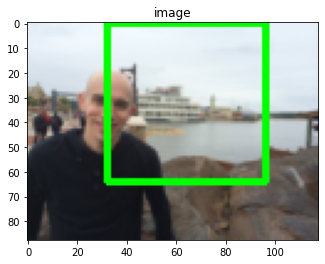

In [11]:
fig = plt.figure()
for layer in pyramid(image, scale=args["scale"]):
    for (x,y,window) in sliding_window(layer, stepSize=32, windowSize=(winW, winH)):
        if window.shape[0]!=winH or window.shape[1]!=winW:
            continue
        
        #below is where we process windo, extract hog features 
        #and apply ml to perform object detection
        clone = layer.copy()
        cv2.rectangle(clone, (x,y), (x+winW, y+winH), (0,255,0), 2)
        create_subplot(fig, 1, 1, 1, "image", clone)
        time.sleep(0.025)